# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [296]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [297]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [298]:
data.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [299]:
import time

professions = ["Аналитик данных", "Садовник", "Повар", "Стоматолог", "Учитель"]
ans = []
for prof in professions:
  time.sleep(10)
  params = {
    'text': prof,
    'area': 1,
    'page': 0,
    'per_page': 100
  }
  data = requests.get(URL, params).json()
  ans.append(data)

(1 балл) Посчитайте сколько всего найдено вакансий:

In [300]:
cnt = 0
for data in ans:
  cnt += len(data["items"])
print(cnt)

500


(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [301]:
class Company:
  def __init__(self, name, latitude, longitude):
    self.name = name
    self.latitude = latitude
    self.longitude = longitude

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [302]:
companies = []
for data in ans:
  for vacancy in data["items"]:
    if vacancy["address"] and vacancy["address"]["lat"] and vacancy["address"]["lng"]:
      company = Company(vacancy["employer"]["name"],
                        vacancy["address"]["lat"],
                        vacancy["address"]["lng"])
      companies.append(company)


Посчитаю среднюю зарплату:

In [303]:
for i in range(5):
  print(professions[i], end=":   ")
  data = ans[i]
  sum = 0
  cnt = 0
  for vacancy in data["items"]:
    if vacancy["salary"] and (vacancy["salary"]["from"] or vacancy["salary"]["to"]):
      if vacancy["salary"]["from"]:
        sum += float(vacancy["salary"]["from"])
      else:
        sum += float(vacancy["salary"]["to"])
      cnt += 1
  if cnt > 0:
    print(sum / cnt)
  else:
    print("no salaries")

Аналитик данных:   127501.73076923077
Садовник:   98153.40909090909
Повар:   139844.44444444444
Стоматолог:   147517.24137931035
Учитель:   88078.5974025974


(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [304]:
print(len(companies))

315


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [305]:
into_mkad = []
for data in ans:
  for vacancy in data["items"]:
    if vacancy["address"] and vacancy["address"]["lat"] and vacancy["address"]["lng"]:
      lat = vacancy["address"]["lat"]
      lng = vacancy["address"]["lng"]
      if 55.57 < lat < 55.91 and 37.37 < lng < 37.84:
        into_mkad.append(vacancy)
print(len(into_mkad))

264


(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

Text(0, 0.5, 'Широта')

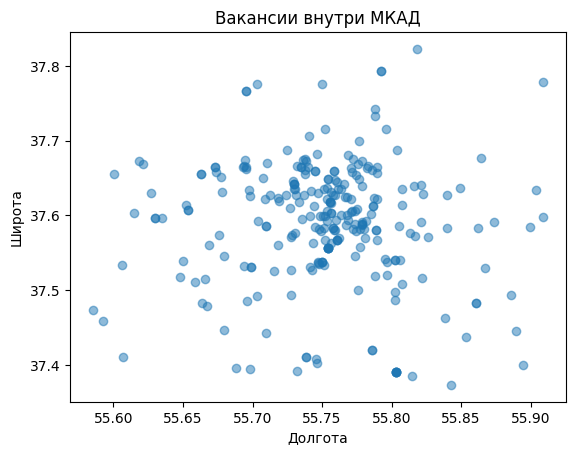

In [306]:
first = []
second = []
for vacancy in into_mkad:
  first.append(vacancy["address"]["lat"])
  second.append(vacancy["address"]["lng"])
plt.scatter(first, second, alpha=0.5)
plt.title("Вакансии внутри МКАД")
plt.xlabel("Долгота")
plt.ylabel("Широта")

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

In [307]:
import plotly.express as px

df = pd.DataFrame({"lat": first, "lon": second})
fig = px.scatter_mapbox(df, lat="lat", lon="lon", zoom=9, opacity=0.8)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

1) Только 60% вакансий содержат адрес компании

2) Наибольшее количество вакансий находится в центральной части Москвы

3) Как ни странно, самые высокие зарплаты среди выбранных профессий у стоматолога и повара, самые низкие у учителей

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [308]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 98.9MB/s]


Создадим DataFrame:

In [309]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


(0.5 балла) Выведете первые 5 строк датасета:

In [310]:
print(diamonds.head(5))

   Unnamed: 0    cut color clarity  carat_weight cut_quality  lab   symmetry  \
0           0  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
1           1  Round     E    VVS2          0.09   Very Good  IGI  Very Good   
2           2  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
3           3  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
4           4  Round     E    VVS2          0.09   Very Good  IGI  Very Good   

      polish eye_clean  ... meas_depth girdle_min  girdle_max  fluor_color  \
0  Very Good   unknown  ...       1.79          M           M      unknown   
1  Very Good   unknown  ...       1.78        STK         STK      unknown   
2  Very Good   unknown  ...       1.77         TN           M      unknown   
3  Very Good   unknown  ...       1.78          M         STK      unknown   
4  Excellent   unknown  ...       1.82        STK         STK      unknown   

   fluor_intensity  fancy_color_dominant_color  fa

(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [311]:
print(len(diamonds))

219703


(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [312]:
print(diamonds['total_sales_price'].idxmax(), '-', diamonds['total_sales_price'].max())
print(diamonds['total_sales_price'].idxmin(), '-', diamonds['total_sales_price'].min())

219702 - 1449881
0 - 200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [313]:
diamonds = diamonds.replace(to_replace='unknown', value=np.nan)
diamonds = diamonds.fillna(value=np.nan)
print(diamonds.isna().sum().sum())

1891168


(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [314]:
sum_isna = diamonds.isna().sum()
for name in diamonds.columns:
  if sum_isna[name]:
    print(name)

color
cut_quality
eye_clean
culet_size
culet_condition
girdle_min
girdle_max
fluor_color
fluor_intensity
fancy_color_dominant_color
fancy_color_secondary_color
fancy_color_overtone
fancy_color_intensity


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [315]:
bad_columns = list(filter(lambda l: l.startswith('fancy_color_') or l.startswith('fluor_'), diamonds.columns))
print(len(bad_columns))

6


2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [316]:
for col in bad_columns:
  print(col, end=":    ")
  print(diamonds[col].notna().sum())

fluor_color:    15726
fluor_intensity:    76084
fancy_color_dominant_color:    9164
fancy_color_secondary_color:    1062
fancy_color_overtone:    388
fancy_color_intensity:    9162


3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [317]:
diamonds.drop(bad_columns, axis=1, inplace=True)
print(diamonds.head())

   Unnamed: 0    cut color clarity  carat_weight cut_quality  lab   symmetry  \
0           0  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
1           1  Round     E    VVS2          0.09   Very Good  IGI  Very Good   
2           2  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
3           3  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
4           4  Round     E    VVS2          0.09   Very Good  IGI  Very Good   

      polish eye_clean culet_size culet_condition  depth_percent  \
0  Very Good       NaN          N             NaN           62.7   
1  Very Good       NaN          N             NaN           61.9   
2  Very Good       NaN        NaN             NaN           61.1   
3  Very Good       NaN        NaN             NaN           62.0   
4  Excellent       NaN          N             NaN           64.9   

   table_percent  meas_length  meas_width  meas_depth girdle_min girdle_max  \
0           59.0         2.85  

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [318]:
bad_columns = list(filter(lambda l: l.startswith('culet_'), diamonds.columns))
print(len(bad_columns))

for col in bad_columns:
  print(col, end=":    ")
  print(diamonds[col].notna().sum())

diamonds.drop(bad_columns, axis=1, inplace=True)
print(diamonds.head())

2
culet_size:    133963
culet_condition:    15319
   Unnamed: 0    cut color clarity  carat_weight cut_quality  lab   symmetry  \
0           0  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
1           1  Round     E    VVS2          0.09   Very Good  IGI  Very Good   
2           2  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
3           3  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
4           4  Round     E    VVS2          0.09   Very Good  IGI  Very Good   

      polish eye_clean  depth_percent  table_percent  meas_length  meas_width  \
0  Very Good       NaN           62.7           59.0         2.85        2.87   
1  Very Good       NaN           61.9           59.0         2.84        2.89   
2  Very Good       NaN           61.1           59.0         2.88        2.90   
3  Very Good       NaN           62.0           59.0         2.86        2.88   
4  Excellent       NaN           64.9           58.5         2.7

(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [319]:
print(diamonds['total_sales_price'].sum())

1517721991


Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [320]:
print(diamonds.loc[::2])

        Unnamed: 0    cut color clarity  carat_weight cut_quality  lab  \
0                0  Round     E    VVS2          0.09   Excellent  IGI   
2                2  Round     E    VVS2          0.09   Excellent  IGI   
4                4  Round     E    VVS2          0.09   Very Good  IGI   
6                6  Round     E    VVS2          0.09   Very Good  IGI   
8                8  Round     E    VVS2          0.09   Very Good  IGI   
...            ...    ...   ...     ...           ...         ...  ...   
219694      219695  Round     D      IF         12.52   Excellent  HRD   
219696      219697   Oval     H     VS2         18.88         NaN  GIA   
219698      219699  Round     E     VS1         10.65   Excellent  GIA   
219700      219701  Round     E     VS1         18.07   Excellent  GIA   
219702      219703   Pear   NaN    VVS2         10.03         NaN  GIA   

         symmetry     polish eye_clean  depth_percent  table_percent  \
0       Very Good  Very Good       NaN 

(0.5 балла) А теперь с индексами, кратными 6:

In [321]:
print(diamonds.loc[::6])

        Unnamed: 0      cut color clarity  carat_weight cut_quality  lab  \
0                0    Round     E    VVS2          0.09   Excellent  IGI   
6                6    Round     E    VVS2          0.09   Very Good  IGI   
12              12    Round     E    VVS2          0.09   Very Good  IGI   
18              18    Round     E    VVS2          0.09   Excellent  IGI   
24              24    Round     L      I1          0.34   Excellent  IGI   
...            ...      ...   ...     ...           ...         ...  ...   
219678      219679    Round     G     VS1         10.23   Excellent  GIA   
219684      219685  Radiant   NaN      I1          0.89         NaN  GIA   
219690      219691    Round     D    VVS2         10.10   Excellent  GIA   
219696      219697     Oval     H     VS2         18.88         NaN  GIA   
219702      219703     Pear   NaN    VVS2         10.03         NaN  GIA   

         symmetry     polish eye_clean  depth_percent  table_percent  \
0       Very Go

(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [322]:
cat_feature = ['cut', 'color', 'clarity', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean', 'girdle_min', 'girdle_max']
print(diamonds[cat_feature])

             cut color clarity cut_quality  lab   symmetry     polish  \
0          Round     E    VVS2   Excellent  IGI  Very Good  Very Good   
1          Round     E    VVS2   Very Good  IGI  Very Good  Very Good   
2          Round     E    VVS2   Excellent  IGI  Very Good  Very Good   
3          Round     E    VVS2   Excellent  IGI  Very Good  Very Good   
4          Round     E    VVS2   Very Good  IGI  Very Good  Excellent   
...          ...   ...     ...         ...  ...        ...        ...   
219698     Round     E     VS1   Excellent  GIA  Excellent  Excellent   
219699   Radiant   NaN     VS2         NaN  GIA  Very Good  Very Good   
219700     Round     E     VS1   Excellent  GIA  Excellent  Excellent   
219701  Princess   NaN     SI2         NaN  GIA       Good       Good   
219702      Pear   NaN    VVS2         NaN  GIA  Very Good  Excellent   

       eye_clean girdle_min girdle_max  
0            NaN          M          M  
1            NaN        STK        STK  


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [323]:
# your code here

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

clear_copy = diamonds[diamonds['color'].notna()]


clear_copy.plot.scatter(x='total_sales_price', y='color')

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

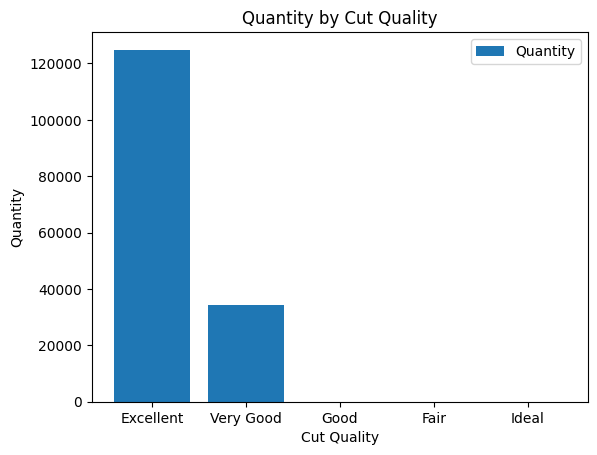

In [324]:
clear_copy = diamonds[diamonds['cut_quality'].notna()]
quality_to_count = clear_copy['cut_quality'].value_counts().reset_index()

plt.bar(quality_to_count['cut_quality'], quality_to_count['count'], label='Quantity')
plt.title('Quantity by Cut Quality')
plt.xlabel('Cut Quality')
plt.ylabel('Quantity')
plt.legend()

(2 балла) Постройте график `вес бриллианта - стоимость`:

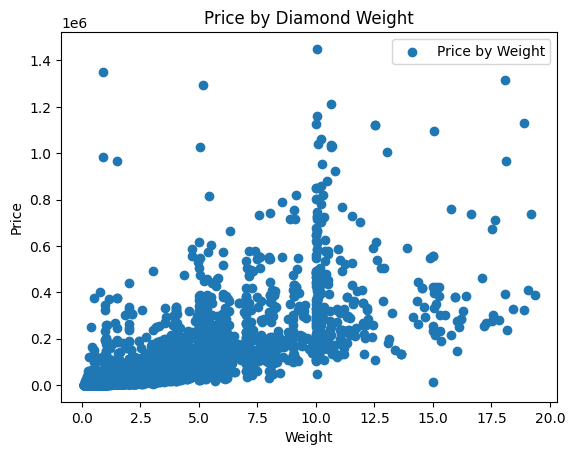

In [325]:
copy = diamonds[diamonds['color'].notna()]
q5 = copy['total_sales_price'].quantile(0.05)
q95 = copy['total_sales_price'].quantile(0.95)
copy = copy[(copy['total_sales_price'] > q5) & (copy['total_sales_price'] < q95)]

plt.scatter(diamonds['carat_weight'], diamonds['total_sales_price'], label='Price by Weight')
plt.title('Price by Diamond Weight')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.legend()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

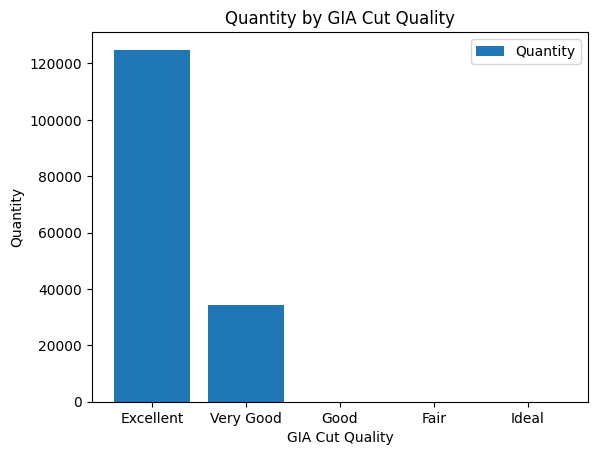

In [326]:
clear_copy = diamonds[diamonds['cut_quality'].notna()]
quality_to_count = clear_copy['cut_quality'].value_counts().reset_index()

plt.bar(quality_to_count['cut_quality'], quality_to_count['count'], label='Quantity')
plt.title('Quantity by GIA Cut Quality')
plt.xlabel('GIA Cut Quality')
plt.ylabel('Quantity')
plt.legend()

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

1) Наименьшую среднюю цену имеют бриллианты цвета Е, наибольшую - цвета М, остальные соотношения цен можно увидеть на графике

2) Чем больше вес бриллианта, тем больше его стоимость

3) Больше всего бриллиантов получают оценки Excellent или Very Good, бриллиантов с оценками Good, Fair, Ideal очень мало

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [327]:
diam = diamonds[['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']]
print(diam.head(10))

   meas_length  meas_width  meas_depth  total_sales_price
0         2.85        2.87        1.79                200
1         2.84        2.89        1.78                200
2         2.88        2.90        1.77                200
3         2.86        2.88        1.78                200
4         2.79        2.83        1.82                200
5         2.95        2.99        1.81                200
6         2.85        2.88        1.84                200
7         2.86        2.89        1.78                200
8         2.89        2.92        1.85                200
9         2.83        2.87        1.80                200


(1 балл) Перемешайте строки в датафрейме случайным образом:

In [328]:
diam = diam.sample(frac=1)
print(diam.head())

        meas_length  meas_width  meas_depth  total_sales_price
52542          4.43        4.46        2.80                950
110876         4.90        4.97        3.18               2052
159678         5.83        5.74        4.00               4540
60728          4.71        4.73        2.94                992
178579         7.36        5.46        3.53               7626


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [329]:
diam['sum_mink'] = diam['meas_length'] + diam['meas_width'] + diam['meas_depth']
print(diam.head())

        meas_length  meas_width  meas_depth  total_sales_price  sum_mink
52542          4.43        4.46        2.80                950     11.69
110876         4.90        4.97        3.18               2052     13.05
159678         5.83        5.74        4.00               4540     15.57
60728          4.71        4.73        2.94                992     12.38
178579         7.36        5.46        3.53               7626     16.35


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [330]:
new_diam = diam[['sum_mink', 'total_sales_price']]
print(new_diam.head())

        sum_mink  total_sales_price
52542      11.69                950
110876     13.05               2052
159678     15.57               4540
60728      12.38                992
178579     16.35               7626


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [331]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(diam, train_size=0.8)

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

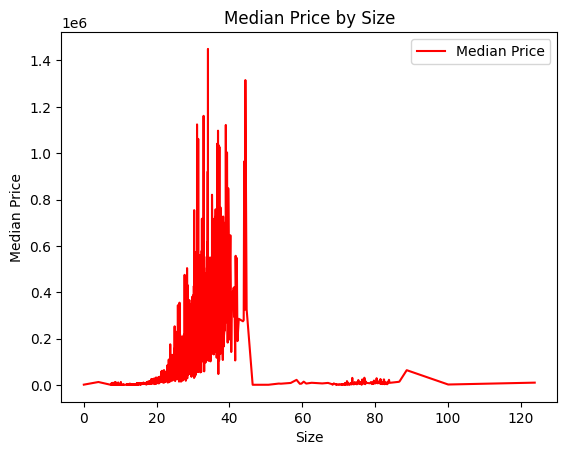

In [332]:
sz_to_median_price1 = {}
for sz in np.sort(train['sum_mink'].unique()):
  sz_to_median_price1[sz] = train.loc[train['sum_mink'] == sz]['total_sales_price'].median()

plt.plot(sz_to_median_price1.keys(), sz_to_median_price1.values(), 'r-', label='Median Price')
plt.title('Median Price by Size')
plt.xlabel('Size')
plt.ylabel('Median Price')
plt.legend()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

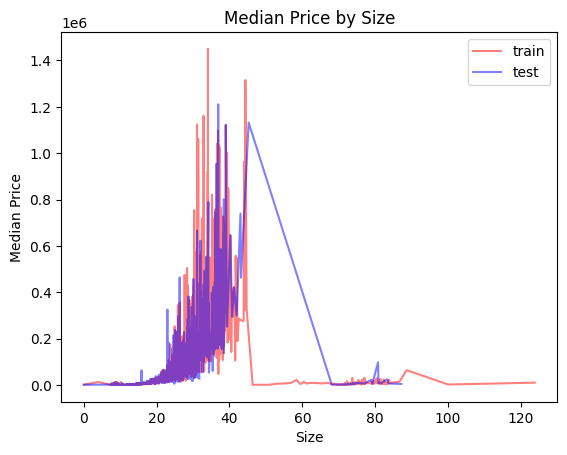

In [333]:
sz_to_median_price2 = {}
for sz in np.sort(test['sum_mink'].unique()):
  sz_to_median_price2[sz] = test.loc[test['sum_mink'] == sz]['total_sales_price'].median()

plt.plot(sz_to_median_price1.keys(), sz_to_median_price1.values(), 'r-', label='train', alpha=0.5)
plt.plot(sz_to_median_price2.keys(), sz_to_median_price2.values(), 'b-', label='test', alpha=0.5)
plt.title('Median Price by Size')
plt.xlabel('Size')
plt.ylabel('Median Price')
plt.legend()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [334]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(n_neighbors=1).fit(train[['meas_length', 'meas_width', 'meas_depth']])
neighbours = model.kneighbors(test[['meas_length', 'meas_width', 'meas_depth']], 1, return_distance=False)
print(neighbours)

[[ 84270]
 [ 75025]
 [ 10769]
 ...
 [ 19276]
 [ 83847]
 [119572]]


(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [335]:
sum = 0
for test_index in range(len(neighbours)):
  train_index = neighbours[test_index][0]
  first = test.iloc[test_index]['total_sales_price']
  second = train.iloc[train_index]['total_sales_price']
  sum += abs(first - second) / max(first, second)
print('В среднем цена отличается на ', sum / len(neighbours) * 100, '%', sep='')

В среднем цена отличается на 26.544381511271236%


**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [336]:
from sklearn.preprocessing import OneHotEncoder

#['cut', 'color', 'clarity', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean', 'girdle_min', 'girdle_max']

features = ['clarity', 'cut']
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(diamonds[features])
encoded_diamonds = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(features))
print(encoded_diamonds)

        clarity_I1  clarity_I2  clarity_I3  clarity_IF  clarity_SI1  \
0              0.0         0.0         0.0         0.0          0.0   
1              0.0         0.0         0.0         0.0          0.0   
2              0.0         0.0         0.0         0.0          0.0   
3              0.0         0.0         0.0         0.0          0.0   
4              0.0         0.0         0.0         0.0          0.0   
...            ...         ...         ...         ...          ...   
219698         0.0         0.0         0.0         0.0          0.0   
219699         0.0         0.0         0.0         0.0          0.0   
219700         0.0         0.0         0.0         0.0          0.0   
219701         0.0         0.0         0.0         0.0          0.0   
219702         0.0         0.0         0.0         0.0          0.0   

        clarity_SI2  clarity_SI3  clarity_VS1  clarity_VS2  clarity_VVS1  ...  \
0               0.0          0.0          0.0          0.0        

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [337]:
train, test, train_ans, test_ans = train_test_split(encoded_diamonds, diamonds['total_sales_price'], train_size=0.8)

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [338]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(train, train_ans)

DecisionTreeRegressor()

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [339]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(test_ans, tree.predict(test)))

674648023.974255


(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

1) Примитивная модель, находящая одного ближайшего соседа по параметрам алмаза, уже довольно хорошо предсказывает цену - ошибается в среднем на 26%. Возможно, усовершествовав эту модель можно получить очень большую точность

2) Пара с наименьшей ошибкой - 'clarity', 'color' - возможно, эти признаки больше всего влияют на цену алмаза (стоит учитывать, что я проверяю ошибку работы модели, а ее обучение отличается от раза к разу, поэтому, при другом запуске парой с наименьшей ошибкой может оказаться другая пара. Поэтому, чтобы узнать наиболее "влиятельные" признаки, стоит запустить этот алгоритм много раз и взять наиболее популярную пару, но это занимает слишком много времени)

3) Уже реализованные инструменты гораздо удобнее самописных, они работают гораздо быстрее (например, поиск ближайшего соседа из sklearn работает за пару минут, когда самописный (без оптимизаций) не отработал даже за час)